Anomaly detection system

In [ ]:
import  pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [ ]:

df =pd.read_csv('/content/Copy of FinancialMarketData.xlsx - EWS.csv')

In [ ]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [ ]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [ ]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

In [ ]:
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df = df.fillna(method='ffill').fillna(method='bfill')

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(scaled_df)


IsolationForest(contamination=0.05, random_state=42)

In [ ]:
df['Anomaly_Score'] = model.decision_function(scaled_df)
df['Anomaly'] = model.predict(scaled_df)

In [ ]:
anomalies = df[df['Anomaly'] == -1]

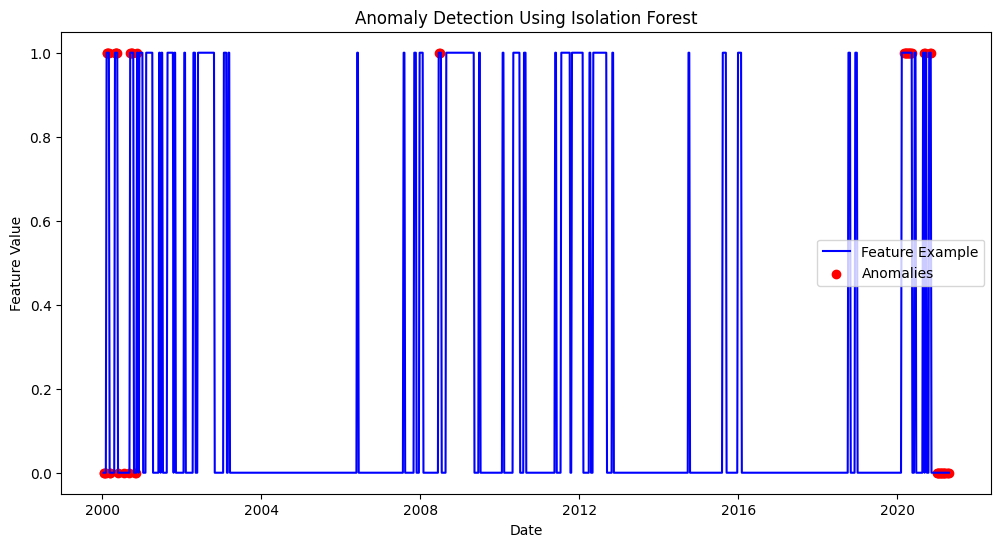

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.iloc[:, 0], label='Feature Example', color='blue')
plt.scatter(anomalies.index, anomalies.iloc[:, 0], color='red', label='Anomalies')
plt.title('Anomaly Detection Using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('FinancialMarketData.xlsx - EWS.csv')

sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))


In [ ]:
sns.countplot(x="Y",data=df)
plt.title("Distribtution of Anormalies")

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values('Data')
sns.scatterplot(data=df, x="Data", y="VIX", hue="Y")
plt.title("VIX Anormalies")

In [ ]:
import pandas as pd
import plotly.graph_objects as go

black_swan_events = [
    {"date": "2000-03-10", "label": "Dotcom Crisis"},
    {"date": "2001-09-11", "label": "9/11"},
    {"date": "2008-09-01", "label": "Financial Crisis"},
    {"date": "2009-11-05", "label": "EU Debt Crisis"},
    {"date": "2011-03-11", "label": "Fukushima Disaster"},
    {"date": "2014-01-01", "label": "Crude Oil Crisis"},
    {"date": "2015-08-24", "label": "China Black Monday"},
    {"date": "2020-03-03", "label": "COVID Pandemic"},
]
# Filter the data where Y == 1
y_equals_1_data = df[df['Y'] == 1]

#'BDIY','VIX',  'LF98TRUU','DXY', 'MXUS'
# Define the columns to plot
columns_to_plot = ['ECSURPUS', 'USGG30YR', 'XAU BGNL', 'Cl1', 'GTDEM10Y', 'USGG2YR', 'MXUS']

# Create a Plotly figure
fig = go.Figure()

# Add line plots for each column
for col in columns_to_plot:
    if col in df.columns:
        fig.add_trace(go.Scatter(
            x=df['Data'],
            y=df[col],
            mode='lines',
            name=f'{col} Stock Price',
            hovertemplate='<b>Date</b>: %{x}<br><b>Price</b>: %{y}<extra></extra>'
        ))

# Add scatter plots for anomalies (Y == 1)
for col in columns_to_plot:
    if col in y_equals_1_data.columns:
        fig.add_trace(go.Scatter(
            x=y_equals_1_data['Data'],
            y=y_equals_1_data[col],
            mode='markers',
            name=f'{col} Anomalies (Y=1)',
            marker=dict(color='blue', size=8),
            hovertemplate='<b>Date</b>: %{x}<br><b>Price</b>: %{y}<extra></extra>'
        ))

# Add vertical lines and annotations for black swan events
for event in black_swan_events:
    event_date = pd.to_datetime(event['date'])
    fig.add_shape(
        type="line",
        x0=event_date,
        x1=event_date,
        y0=df[columns_to_plot].min().min(),  # Minimum Y value
        y1=df[columns_to_plot].max().max(),  # Maximum Y value
        line=dict(color="red", width=2, dash="dash"),
    )
    fig.add_annotation(
        x=event_date,
        y=df[columns_to_plot].max().max(),
        text=event['label'],
        showarrow=False,
        yshift=10,
        font=dict(color="red", size=10),
    )

# Customize the layout
fig.update_layout(
    title="Stock Prices with Anomalies Highlighted (Y = 1)",
    xaxis_title="Date",
    yaxis_title="Stock Price",
    legend_title="Legend",
    template="plotly_white",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    hovermode="x unified"
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

black_swan_events = [
    {"date": "2000-03-10", "label": "Dotcom Crisis"},
    {"date": "2001-09-11", "label": "9/11"},
    {"date": "2008-09-01", "label": "Financial Crisis"},
    {"date": "2009-11-05", "label": "EU Debt Crisis"},
    {"date": "2011-03-11", "label": "Fukushima Disaster"},
    {"date": "2014-01-01", "label": "Crude Oil Crisis"},
    {"date": "2015-08-24", "label": "China Black Monday"},
    {"date": "2020-03-03", "label": "COVID Pandemic"},
]
# Filter the data where Y == 1
y_equals_1_data = df[df['Y'] == 1]

#'BDIY','VIX',  'LF98TRUU','DXY', 'MXUS'
# Define the columns to plot
columns_to_plot = ['ECSURPUS', 'USGG30YR', 'XAU BGNL', 'Cl1', 'GTDEM10Y', 'USGG2YR', 'MXUS']

# Create a Plotly figure
fig = go.Figure()

# Add line plots for each column
for col in columns_to_plot:
    if col in df.columns:
        fig.add_trace(go.Scatter(
            x=df['Data'],
            y=df[col],
            mode='lines',
            name=f'{col} Stock Price',
            hovertemplate='<b>Date</b>: %{x}<br><b>Price</b>: %{y}<extra></extra>'
        ))

# Add scatter plots for anomalies (Y == 1)
for col in columns_to_plot:
    if col in y_equals_1_data.columns:
        fig.add_trace(go.Scatter(
            x=y_equals_1_data['Data'],
            y=y_equals_1_data[col],
            mode='markers',
            name=f'{col} Anomalies (Y=1)',
            marker=dict(color='blue', size=8),
            hovertemplate='<b>Date</b>: %{x}<br><b>Price</b>: %{y}<extra></extra>'
        ))

# Add vertical lines and annotations for black swan events
for event in black_swan_events:
    event_date = pd.to_datetime(event['date'])
    fig.add_shape(
        type="line",
        x0=event_date,
        x1=event_date,
        y0=df[columns_to_plot].min().min(),  # Minimum Y value
        y1=df[columns_to_plot].max().max(),  # Maximum Y value
        line=dict(color="red", width=2, dash="dash"),
    )
    fig.add_annotation(
        x=event_date,
        y=df[columns_to_plot].max().max(),
        text=event['label'],
        showarrow=False,
        yshift=10,
        font=dict(color="red", size=10),
    )

# Customize the layout
fig.update_layout(
    title="Stock Prices with Anomalies Highlighted (Y = 1)",
    xaxis_title="Date",
    yaxis_title="Stock Price",
    legend_title="Legend",
    template="plotly_white",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    hovermode="x unified"
)

# Show the plot
fig.show()


In [ ]:
df['VIX_4Week_MA'] = df['VIX'].rolling(window=4).mean()
df['DXY_4Week_MA'] = df['DXY'].rolling(window=4).mean()
df['Cl1_4Week_MA'] = df['Cl1'].rolling(window=4).mean()
df['GTITL10YR_4Week_MA'] = df['GTITL10YR'].rolling(window=4).mean()
df['XAU_BGNL_4Week_MA'] = df['XAU BGNL'].rolling(window=4).mean()
df['LF98TRUU_4Week_MA'] = df['LF98TRUU'].rolling(window=4).mean()